# Draw a logo on a map

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.textpath
import matplotlib.patches

from matplotlib.font_manager import FontProperties

%matplotlib inline

def on_draw(event=None):
    """
    Hooks into matplotlib's event mechanism to define the clip path of the
    background image.

    """
    # Clip the image to the current background boundary.
    im.set_clip_path(ax.background_patch.get_path(),
                     transform=ax.background_patch.get_transform())

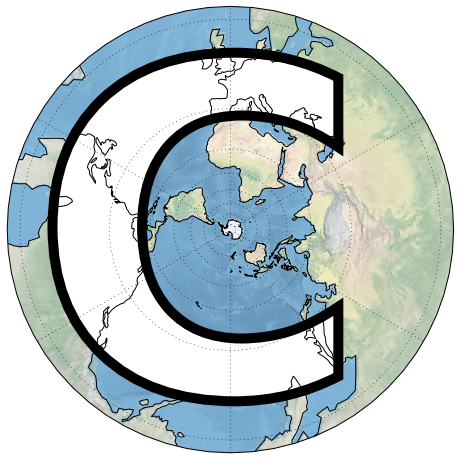

In [2]:
plt.figure(figsize=[8, 8])
ax = plt.axes(projection=ccrs.SouthPolarStereo())

ax.coastlines()
ax.gridlines()

im = ax.stock_img()
    
# Register the on_draw method and call it once now.
plt.gcf().canvas.mpl_connect('draw_event', on_draw)
on_draw()

# Generate a matplotlib path representing the character "C".
fp = FontProperties(family='Bitstream Vera Sans', weight='bold')
logo_path = matplotlib.textpath.TextPath((-4.5e7, -3.7e7),
                                         'C', size=1, prop=fp)

# Scale the letter up to an appropriate X and Y scale.
logo_path._vertices *= np.array([103250000, 103250000])

# Add the path as a patch, drawing black outlines around the text.
patch = matplotlib.patches.PathPatch(logo_path, facecolor='white',
                                     edgecolor='black', linewidth=10,
                                     transform=ccrs.SouthPolarStereo())
ax.add_patch(patch)
plt.show()